<a href="https://www.kaggle.com/code/kbhuvana202006/task-3?scriptVersionId=296050271" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

The SVM classifier achieved approximately 64% accuracy using HOG features. While classical machine learning methods perform reasonably, performance can be further improved using deep learning approaches such as CNNs.


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm


In [2]:
import os

base_path = "/kaggle/input"

print(os.listdir(base_path))


['dogs-vs-cats']


In [3]:
import zipfile
import os

zip_path = "/kaggle/input/dogs-vs-cats/train.zip"
extract_path = "/kaggle/working/train"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")
print(os.listdir(extract_path)[:10])


Extraction completed!
['train']


In [4]:
train_dir = "/kaggle/working/train/train"


In [5]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm

# Dataset path
train_dir = "/kaggle/working/train/train"

image_size = (128, 128)
features = []
labels = []

limit = 4000   # keep small for speed

print("Loading images...")

count = 0
for file in tqdm(os.listdir(train_dir)):
    if file.endswith(".jpg"):
        img_path = os.path.join(train_dir, file)

        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        hog_features = hog(
            gray,
            pixels_per_cell=(8,8),
            cells_per_block=(2,2)
        )

        features.append(hog_features)

        if file.startswith("dog"):
            labels.append(1)
        else:
            labels.append(0)

        count += 1
        if count >= limit:
            break

features = np.array(features)
labels = np.array(labels)

print("Total samples:", len(features))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42
)

# Train SVM
svm = LinearSVC()
svm.fit(X_train, y_train)

print("Training complete!")

# Evaluate
y_pred = svm.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Cat","Dog"]))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Loading images...


 16%|█▌        | 3999/25000 [00:34<02:59, 116.85it/s]


Total samples: 4000
Training complete!

Classification Report:

              precision    recall  f1-score   support

         Cat       0.66      0.65      0.66       406
         Dog       0.65      0.66      0.65       394

    accuracy                           0.65       800
   macro avg       0.65      0.65      0.65       800
weighted avg       0.65      0.65      0.65       800


Confusion Matrix:

[[264 142]
 [135 259]]


In [6]:
print(features.shape)
print(labels.shape)


(4000, 8100)
(4000,)


In [7]:
np.unique(labels, return_counts=True)


(array([0, 1]), array([2035, 1965]))

In [8]:
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.65375


Image: dog.10035.jpg
Prediction: Dog


(np.float64(-0.5), np.float64(127.5), np.float64(127.5), np.float64(-0.5))

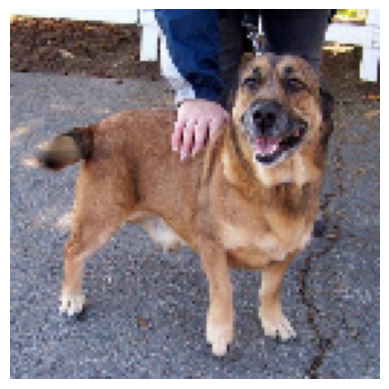

In [9]:
sample_img = os.listdir(train_dir)[100]

img_path = os.path.join(train_dir, sample_img)

img = cv2.imread(img_path)
img = cv2.resize(img, (128,128))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

hog_features = hog(gray, pixels_per_cell=(8,8), cells_per_block=(2,2))

prediction = svm.predict([hog_features])[0]

print("Image:", sample_img)
print("Prediction:", "Dog" if prediction==1 else "Cat")

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
